<a href="https://colab.research.google.com/github/trivikram-naidu/muffin-vs-cupcake/blob/main/MUffin_vs_Cupcake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#packages for data analysis
import numpy as np
import pandas as pd

from sklearn import svm

#library for visulilation
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale =1.2 )


In [ ]:
recipes = pd.read_csv("/content/Cupcakes vs Muffins.csv")

In [ ]:
recipes.head()

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0


In [ ]:
recipes.tail()

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
15,Cupcake,42,18,25,9,5,1,0,0
16,Cupcake,36,14,21,14,11,2,1,0
17,Cupcake,38,15,31,8,6,1,1,0
18,Cupcake,36,16,24,12,9,1,1,0
19,Cupcake,34,17,23,11,13,0,1,0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


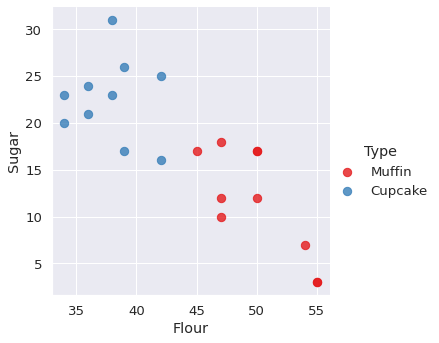

In [ ]:
#ploting the data
sns.lmplot('Flour','Sugar',data=recipes, hue='Type',
           palette='Set1',fit_reg=False,scatter_kws ={'s':70});

In [ ]:
#format or pre process our data
type_label = np.where(recipes['Type'] == 'Muffin',0,1)
recipes_features = recipes.columns.values[1:].tolist()
recipes_features

['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']

In [ ]:
ingredients = recipes[['Flour','Sugar']].values
print(ingredients)

[[55  3]
 [47 12]
 [47 18]
 [45 17]
 [50 12]
 [55  3]
 [54  7]
 [47 10]
 [50 17]
 [50 17]
 [39 26]
 [42 16]
 [34 20]
 [39 17]
 [38 23]
 [42 25]
 [36 21]
 [38 31]
 [36 24]
 [34 23]]


In [ ]:
#fit model
model =svm.SVC(kernel ='linear')
model.fit(ingredients,type_label)

SVC(kernel='linear')

In [ ]:
#get the seperating hyperplane
w = model.coef_[0]
a = -w[0]/w[1]
xx= np.linspace(30,60)
yy = a*xx-(model.intercept_[0])/w[1]

#plot the parllelels to the seperating hyperplane that pass through the support vectors
b= model.support_vectors_[0]
yy_down = a*xx+(b[1]-a*b[0])
b = model.support_vectors_[-1]
yy_up = a*xx+(b[1]-a*b[0])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


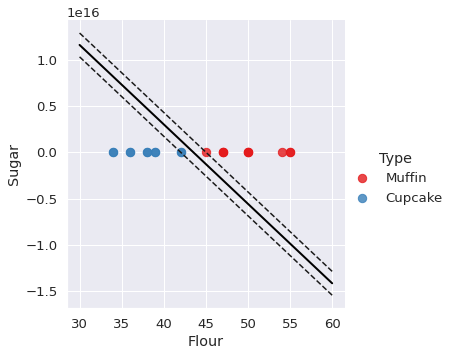

In [ ]:
#ploting the data
sns.lmplot('Flour','Sugar',data=recipes, hue='Type',
           palette='Set1',fit_reg=False,scatter_kws ={'s':70});
plt.plot(xx,yy,linewidth = 2,color ='black')
plt.plot(xx,yy_down,'k--')
plt.plot(xx,yy_up,'k--')

In [ ]:
#create a function to predict muffin or cupcake
def muffin_or_cupcake(Flour,Sugar):
  if(model.predict([[Flour ,Sugar]]))==0:
    print("you\'re looking at muffin recipe")
  else:
    print("you\'re looking at cupcake recipe")
#predict if 50 parts flour and 20 parts of sugar
muffin_or_cupcake(20,35)

you're looking at cupcake recipe
